In [38]:
import mysql.connector
import webbrowser
import matplotlib.pyplot as plt
import mpld3
import nltk

In [73]:
conn = mysql.connector.connect(user='root', password='pass1234',host='localhost',database='projectdb',auth_plugin='mysql_native_password')

if conn:
    print ("Connected Successfully")
else:
    print ("Connection Not Established")

Connected Successfully


In [74]:
n = input()
statement = "SELECT remarks,assignment_id,marks_obtained FROM student_marks WHERE student_id = "+n
cursor = conn.cursor()
cursor.execute(statement)
result = cursor.fetchall()
assignment=[]
marks=[]
remarks=[]
print(result)
for i in result:
    i = list(i)
    assignment.append(i[1])
    marks.append(int(i[2]))
    remarks.append(i[0])
print(assignment)
print(marks)
print(remarks)


4
[('Very good performance', 'ACC-1', 18), ('Can do better', 'ECO-3', 14), ('Bad', 'MATHS-2', 5)]
['ACC-1', 'ECO-3', 'MATHS-2']
[18, 14, 5]
['Very good performance', 'Can do better', 'Bad']


In [75]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
scores=[]
sentiment={}
positive=0
negative=0
vader = SentimentIntensityAnalyzer()
for i in remarks:
    print(i)
    scores.append(vader.polarity_scores(i)['compound'])
print(scores)
for i in scores:
    if i>=0:
        positive+=1
    else:
        negative+=1
sentiment['Positive'] = positive
sentiment['Negative'] = negative
print(sentiment)

Very good performance
Can do better
Bad
[0.4927, 0.4404, -0.5423]
{'Positive': 2, 'Negative': 1}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Meghna\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


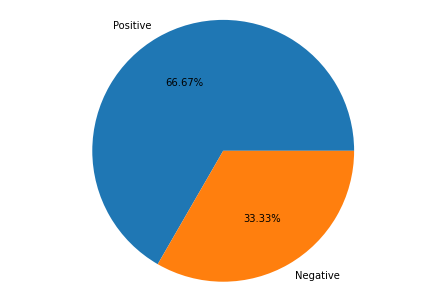

In [76]:
fig1 = plt.figure()
ax1 = fig1.add_axes([0,0,1,1])
ax1.pie(sentiment.values(), labels = sentiment.keys(),autopct='%1.2f%%')
ax1.axis('equal')
plt.show()

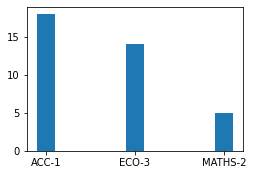

In [82]:
fig = plt.figure()
ax = fig.add_axes([0.5,0.5,0.5,0.5])
ax.bar(assignment,marks,width=0.20)
plt.show()

In [83]:
#mpld3.save_html(fig,'fig.html')
#mpld3.fig_to_html(fig,template_type="simple")
fig.savefig('bar.png')
fig1.savefig('pie.png')
#mpld3.display()